# INFO115 The Social Web. Individual assignment 
__Vsevolod Suschevskiy 285801__
## I Recommendations. 25 points.

### (a) Create an item feature matrix

In [2]:
# Import pandas library 
import pandas as pd 
# initialise data of lists. 
data = {'F1':[1, 1, 0, 0, 0], 'F2':[1, 0, 0, 1, 0], 'F3':[0, 0, 1, 1, 0], 'F4':[0, 1, 1, 0, 1], 'F5':[0, 0, 0, 0, 1]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['A1', 'A2', 'A3', 'A4', 'A5']) 
  
df1= df   
# print the data 
df 

,F1,F2,F3,F4,F5
A1,1,1,0,0,0
A2,1,0,0,1,0
A3,0,0,1,1,0
A4,0,1,1,0,0
A5,0,0,0,1,1


### (b) Create a network representation of the matrix in NetworkX

In [3]:
import numpy as np


df.loc[((df.F1 == 1) | (df.F2 == 1)), "A1"]  = '1'
df.loc[(df.F1 != 1) & (df.F2 != 1), "A1"]  = '0'

df.loc[((df.F1 == 1) | (df.F4 == 1)), "A2"]  = '1'
df.loc[(df.F1 != 1) & (df.F4 != 1), "A2"]  = '0'

df.loc[((df.F4 == 1) | (df.F3 == 1)), "A3"]  = '1'
df.loc[(df.F4 != 1) & (df.F3 != 1), "A3"]  = '0'


df.loc[((df.F2 == 1) | (df.F3 == 1)), "A4"]  = '1'
df.loc[((df.F2 != 1) & (df.F3 != 1)), "A4"]  = '0'

df.loc[((df.F4 == 1) | (df.F5 == 1)), "A5"]  = '1'
df.loc[(df.F4 != 1) & (df.F5 != 1), "A5"]  = '0'

df = df.drop(columns=['F1', 'F2', 'F3', 'F4', 'F5'])

df

,A1,A2,A3,A4,A5
A1,1,1,0,1,0
A2,1,1,1,0,1
A3,0,1,1,1,1
A4,1,0,1,1,0
A5,0,1,1,0,1


In [4]:
df = df.apply(lambda x: x.astype(str).map(lambda x: int(x, base=16)))

{('A5', 'A2'): Text(-0.6545084971874742, 0.2938926261462366, 'F4'),
 ('A5', 'A3'): Text(-0.6545084971874734, -0.29389262614623707, 'F4'),
 ('A2', 'A3'): Text(-0.30901699437494756, -2.220446049250313e-16, 'F4'),
 ('A2', 'A1'): Text(0.24999999999999944, 0.7694208842938137, 'F1'),
 ('A3', 'A4'): Text(0.25000000000000056, -0.7694208842938135, 'F3'),
 ('A1', 'A4'): Text(0.8090169943749476, 4.440892098500626e-16, 'F2')}

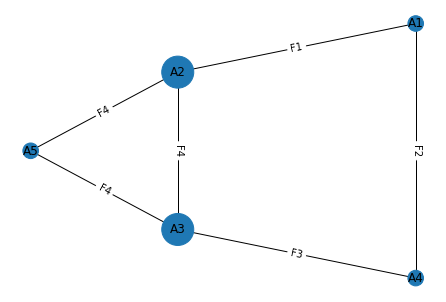

In [6]:
import networkx as nx
G = nx.from_pandas_adjacency(df)
G.name = 'Actors collaborations'
G.remove_edges_from(G.selfloop_edges()) ## loops may exist, better to remove

degs = list(nx.degree(G))
pos = nx.spectral_layout(G)

sizes = []
for s in degs:
        sizes.append((s[1]+1)**5) ## to see difference

nx.draw(G, pos, node_size = sizes, with_labels = True)
nx.draw_networkx_edge_labels(G, pos, node_size = sizes, with_labels = True, edge_labels={('A5','A2'):'F4',
('A5','A3'):'F4', ('A2','A3'):'F4', ('A2','A1'):'F1', ('A3','A4'):'F3', ('A1', 'A4'):'F2'})

Node is actor, link is film, size is degree

### (c) Calculate the density and clustering coefficient of the graph.
Calculate the density and clustering coefficient of the graph. Find the node with the highest betweenness centrality. Find the two films with the highest Jaccard similarity score. Show the calculations in your report. (5 points)

In [7]:
nx.density(G)

# Graph is not super dence
# it misses 3 edges

0.6

Graph is not super dense
it misses 3 edges to be completed 

In [8]:
nx.clustering(G)


{'A1': 0,
 'A2': 0.3333333333333333,
 'A3': 0.3333333333333333,
 'A4': 0,
 'A5': 1.0}

Only for Actor 5 there is only 1 triangle possible and only 1 exists
 for A2 and A3 there are more possible options (1 more), but only 1 exists
 there is no closed triangles for nodes 1 and 4

{'A1': 0.08333333333333333,
 'A2': 0.25,
 'A3': 0.25,
 'A4': 0.08333333333333333,
 'A5': 0.0}

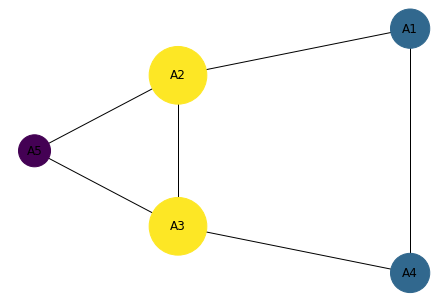

In [9]:
btws = nx.betweenness_centrality(G)
nodes = G.nodes()
b_color = np.asarray([btws[n] for n in nodes])

nx.draw(G, pos, node_size = (b_color+2)**10, node_color =b_color,  with_labels = True)
btws

Actors 2 and 3 have the highest betweenness, since they are the shortest bridge between actor 5 and 1 and 4

In [10]:
preds = nx.jaccard_coefficient(G, [('A1', 'A2'),('A1', 'A4'), ('A4', 'A3'), ('A3', 'A2'), ('A5', 'A2')])
for u, v, p in preds: 
    print(u, v, p)

A1 A2 0.0
A1 A4 0.0
A4 A3 0.0
A3 A2 0.2
A5 A2 0.25


In [12]:
df

,A1,A2,A3,A4,A5
A1,1,1,0,1,0
A2,1,1,1,0,1
A3,0,1,1,1,1
A4,1,0,1,1,0
A5,0,1,1,0,1


In [13]:
from sklearn.metrics import jaccard_score
print("F1 and F2:",jaccard_score(df1['F1'], df1['F2']),
", F1 and F3:", jaccard_score(df1['F1'], df1['F3']),
", F1 and F4:", jaccard_score(df1['F1'], df1['F4']),
", F1 and F5:", jaccard_score(df1['F1'], df1['F5']),
", F2 and F3:", jaccard_score(df1['F2'], df1['F3']),
", F2 and F4:", jaccard_score(df1['F2'], df1['F4']),
", F2 and F5:", jaccard_score(df1['F2'], df1['F5']),
", F3 and F4:", jaccard_score(df1['F3'], df1['F4']),
",F3 and F5:", jaccard_score(df1['F3'], df1['F5']),
",F4 and F5:", jaccard_score(df1['F4'], df1['F5']))

F1 and F2: 0.3333333333333333 , F1 and F3: 0.0 , F1 and F4: 0.25 , F1 and F5: 0.0 , F2 and F3: 0.3333333333333333 , F2 and F4: 0.0 , F2 and F5: 0.0 , F3 and F4: 0.25 ,F3 and F5: 0.0 ,F4 and F5: 0.3333333333333333


(F1 and F2), and (F4 and F5), and (F2 and F3) are the most simular:
in 1 and 2 there are 1 actor in the union (Actor 1) and 3 in the intersection (Actors 1, 2, and 4)
same for others with 0.(3)
F1 and F4, and F3 and F4 have 1 in the union and 4 in the intersection.

### (d) Assume that there are 5 users U1...U5 that have rated the four films F1, F2, F3, F4. 
Furthermore, they have their favorite actors: U1 favors A1, U2 favors A2, U3 favors A3, U4
favors A4 and U5 favors A5. Create a utility matrix with 5 rows and 4 columns where the
rows are users U1-U5 and the columns are films F1-F4. (Same structure as Illustration 7.4 in
The Power of Networks.) The users rate the films on a scale from 0 to 5 based on the
following preferences:
- the user gives the film ‘5’ if her favorite actor appears in the film
- if the user’s favorite actor does not appear in the film, she gives the film a rating
corresponding to the number of actors in the film that appear in another film
together with the user’s favorite actor. (For example, suppose A1 does not
appear in film F1 but actors A3 and A5 do. Because A1 and A3 appear together in
film F2 and A1 and A5 appear together in film F4, U1 will give film F1 a score of ‘2’.)
 Put a depiction of the utility matrix in your report (4 points)


In [14]:
data = {'F1':[5, 5, 1, 1, 1], 'F2':[5, 1, 1, 5, 0], 'F3':[1, 1, 5, 5, 1], 'F4':[1, 5, 5, 1, 5]} 
  
# Creates pandas DataFrame. 
df_rat = pd.DataFrame(data, index =['U1', 'U2', 'U3', 'U4', 'U5']) 
df_rat

,F1,F2,F3,F4
U1,5,5,1,1
U2,5,1,1,5
U3,1,1,5,5
U4,1,5,5,1
U5,1,0,1,5


User U1 have rated movies F1 and F2 with 5 scores, because his favorite actor A1 have participated in both, but he rated F3 only 1, because the only actor that collaborated with A1 and participated in F3 was actor A4, who has participated in movie F2. F4 was rated with a score 1, because A2 played in F1.

User U2 have rated movies F1 and F4 with 5 scores, because his favorite actor A2 have participated in both, but he rated F2 only 1, because the only actor that collaborated with A2 and participated in F2 was actor A1, who has participated in movie F1. F3 was rated with a score 1, because A3 played in F4.

User U3 have rated movies F3 and F4 with 5 scores, because his favorite actor A3 have participated in both, but he rated F1 only 1, because the only actor that collaborated with A3 and participated in F1 was actor A2, who has participated in movie F4. F2 was rated with a score 1, because A4 played in F3.

User U4 have rated movies F2 and F3 with 5 scores, because his favorite actor A4 have participated in both, but he rated F1 only 1, because the only actor that collaborated with A4 and participated in F1 was actor A1, who has participated in movie F2. F4 was rated with a score 1, because A3 played in F3.

User U5 have rated movie F3 with 5 scores, because his favorite actor A5 have participated in it, but he rated F1 only 1, because the only actor that collaborated with A5 and participated in F1 was actor A2, who has participated in movie F4. F3 was rated with a score 1, because A3 played in F4. Movie F2 was rated with 0, since there were no actors that participated in F2 and collaborated with A5.

### (e) Select 5 ratings in the utility matrix you created in d as your test set and use the rest as your training set.
Calculate the naïve predictions and the baseline predictions. Calculate and compare the MSEs of the predictors. Explain the calculations in your report. (6 points)

Let's take movie F4 as Test, and the rest as train, and transpose matrix to split it with sklearn

In [15]:
#df_rat_test = df_rat.drop(columns=['F1', 'F2', 'F3', 'F4', 'F5'])
from sklearn.model_selection import train_test_split

df_rat = df_rat.transpose() 

train, test = train_test_split(df_rat, test_size=0.2, random_state=6920)
train

,U1,U2,U3,U4,U5
F1,5,5,1,1,1
F3,1,1,5,5,1
F2,5,1,1,5,0


In [16]:
test

,U1,U2,U3,U4,U5
F4,1,5,5,1,5


Ok, we predict rating of movie F4, based on other users. We could call it collaboretive filtration, but really low level.

In [17]:
data = {'U1':train.mean(), 'U2':train.mean(), 'U3':train.mean(), 'U4':train.mean(), 'U5':train.mean()} 
  
# Creates pandas DataFrame. 
df_rat_pred = pd.DataFrame(data, index =['U5']) 
df_rat_pred

,U1,U2,U3,U4,U5
U5,0.666667,0.666667,0.666667,0.666667,0.666667


Naive prediction for each movie is just an average value, based on ratings of other users.

In [18]:
from sklearn.metrics import mean_squared_error
MSE_naive = mean_squared_error(test, df_rat_pred)
MSE_naive

11.311111111111108

MSE is 11.31 But to show you power of a flextape I will: calculated it muself: for each movie I have calculated the square difference betwen actual and predicted value, and then took mean of these squared values

In [19]:
((1-0.666)**2+(5-0.666)**2+(5-0.666)**2+(1-0.666)**2+(5-0.666)**2)/5

11.314756

Baseline prediction:
is based on data condotions:

So for each user I have calculated mean, substracted it from general mean, and I use this value to predict rating for a new movie

In [20]:
data = {'U1':train["U1"].mean()-train.mean(), 'U2':train["U2"].mean()-train.mean(), 'U3':train["U3"].mean()-train.mean(), 'U4':train["U4"].mean()-train.mean(), 'U5':train["U5"].mean()-train.mean()} 
    
# Creates pandas DataFrame. 
df_rat_pred_base = pd.DataFrame(data, index =['U5']) 
df_rat_pred_base

,U1,U2,U3,U4,U5
U5,3.0,1.666667,1.666667,3.0,0.0


In [21]:
MSE_Base = mean_squared_error(test, df_rat_pred_base)
MSE_Base

11.044444444444443

In [22]:
((1-3)**2+(5-1.666)**2+(5-1.666)**2+(1-3)**2+(5-0)**2)/5

11.0462224

Difference between MSE

In [23]:
MSE_Base - MSE_naive

-0.2666666666666657

So naive model looks better (by 0.26 squared points), than baseline, but we could be sure, until statistical test